In [3]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Loading the dataset
df_hr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#getting all columns name and checking null values
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation:
    1.no null values are present.

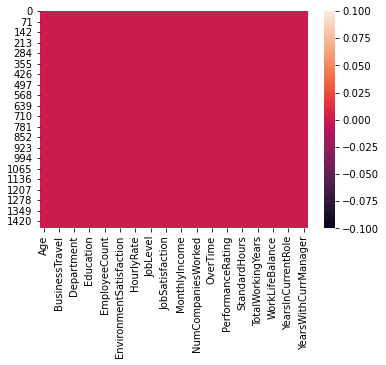

In [6]:
#Visualisatuion of heatmap 
sns.heatmap(df_hr.isnull())
plt.show()

Observation:
    
    From above visualisation we can say  that there are no null values present.

In [7]:
#Lets chcek the datatypes of each column in datset
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#finding unique values in columns with object datatype

for col in df_hr.columns:
    if df_hr.dtypes[col] == object:
        b = df_hr[col].unique()
        c = len(b)
        print(col," : ",c, "\n",
              "Values : ",b)

Attrition  :  2 
 Values :  ['Yes' 'No']
BusinessTravel  :  3 
 Values :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  3 
 Values :  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  6 
 Values :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  2 
 Values :  ['Female' 'Male']
JobRole  :  9 
 Values :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  3 
 Values :  ['Single' 'Married' 'Divorced']
Over18  :  1 
 Values :  ['Y']
OverTime  :  2 
 Values :  ['Yes' 'No']


In [9]:
#Understanding the numerical data
colname=[]
cm = sns.light_palette("green", as_cmap=True)

b= df_hr.groupby("Attrition")["Age"].mean().to_frame(name = "Age").reindex() 

for col in df_hr.columns:
    if df_hr.dtypes[col] != object:
        mean =df_hr.groupby("Attrition")[col].mean().to_frame(name = (col,"_mean")).reindex()
        #median = df_hr.groupby("Attrition")[col].median().to_frame(name = (col,"median")).reindex()
        b= pd.concat([mean,b],axis=1)      
        
        
df_data = b.T
df_data["Difference in %"]= (abs(df_data["No"]-df_data["Yes"]))*100/(df_data["Yes"])
df_data = df_data.sort_values(by=['Difference in %'],ascending=False)
df_data=df_data.reset_index()
df_da= df_data.style.background_gradient(cmap=cm)
df_da

Attrition,index,No,Yes,Difference in %
0,"('StockOptionLevel', '_mean')",0.845093,0.527426,60.229684
1,"('YearsInCurrentRole', '_mean')",4.484185,2.902954,54.469742
2,"('YearsWithCurrManager', '_mean')",4.367397,2.852321,53.117307
3,"('TotalWorkingYears', '_mean')",11.862936,8.244726,43.885149
4,"('YearsAtCompany', '_mean')",7.369019,5.130802,43.623143
5,"('MonthlyIncome', '_mean')",6832.739659,4787.092827,42.732550
6,"('JobLevel', '_mean')",2.145985,1.637131,31.082098
7,"('DistanceFromHome', '_mean')",8.915653,10.632911,16.150407
8,"('YearsSinceLastPromotion', '_mean')",2.234388,1.945148,14.869822
9,"('JobSatisfaction', '_mean')",2.778589,2.468354,12.568470


Observations
Created a table to show major points of difference between people who quit and those who stayed. 
 Found high correlation with following variables 
 
a) Stock Option - People who stayed got upto 60% more stock options

b) Also direct corelation found with Years at company, distance from home , age , num of companies worked, etc

c) Found least coorelation in employeecount, standardhours and performance rating

# Data Visualization

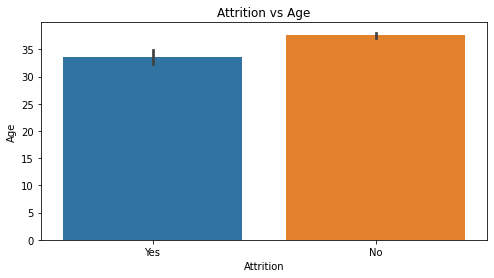

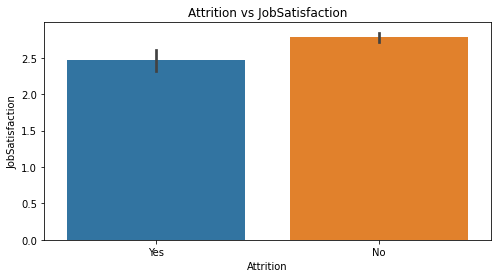

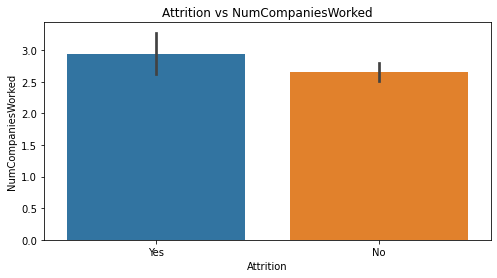

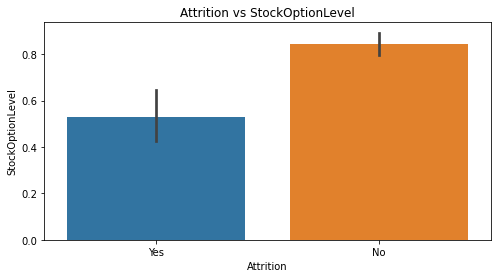

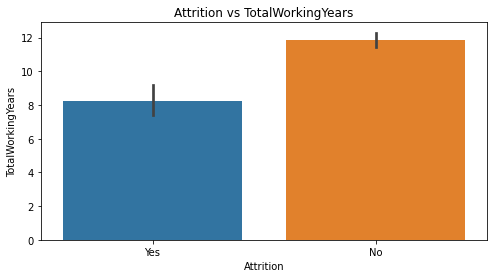

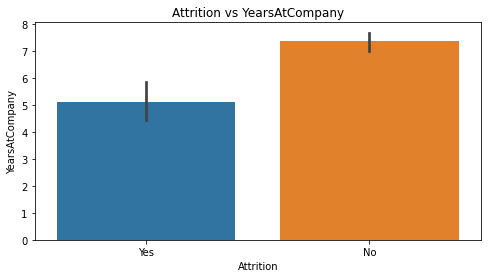

In [10]:
DATA Visualization-Numerical
#first we will plot main corelating variables with bar plot to visualize the data.
l = ['Age', 'JobSatisfaction',  'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany']

for i in l:
    plt.figure(figsize=[8,4])
    sns.barplot(x = 'Attrition',y= i ,data = df_hr)
    plt.title("Attrition vs " + i)
    plt.show()

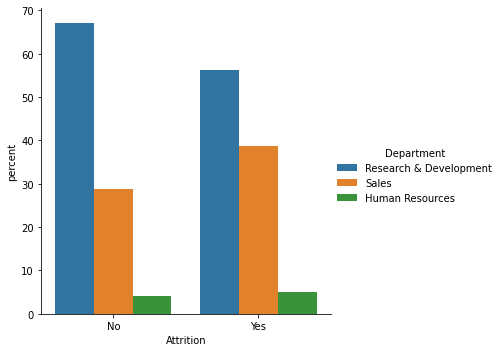

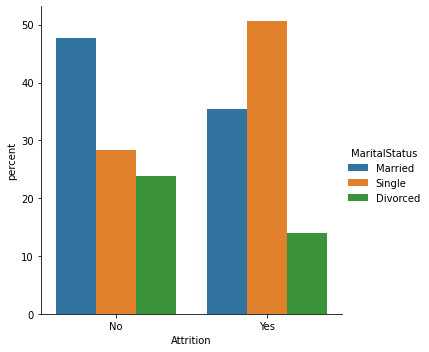

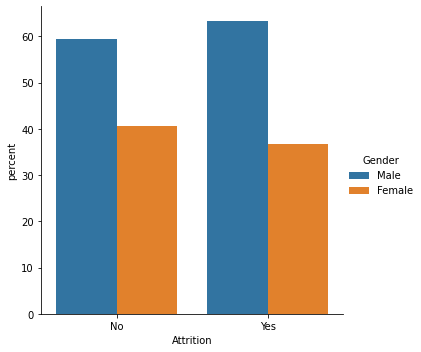

In [11]:
#DATA Visualization - Categorical
#Plotting normalized graph of main factors with categorical data
l = ["Department","MaritalStatus","Gender"]
for i in l:
    x,y = i, 'Attrition'
    df_visual = df_hr.groupby(y)[x].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    g= sns.catplot(x=y,y='percent',hue=x,kind='bar',data=df_visual)

Observations:

a) Upto 20% more people quit in Research department than Sales dept.

b) % of Single people quitting is more than married or divorced employees.

c) %of male employees quitting are 20% higher than females

In [12]:
#we can drop unnamed column and type as they are irrelevant and have no effect on our data
df_hr.drop(['EmployeeCount',"Over18","StandardHours","EmployeeNumber","HourlyRate","PerformanceRating"],axis=1,inplace=True)

In [13]:
#Changing Yes to 1 and No to 0 in attrition column to covert attrition target data into float

df_hr["Attrition"].replace(["Yes","No"],[1,0],inplace=True)

df_hr['Attrition'] = df_hr['Attrition'].astype(float)
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


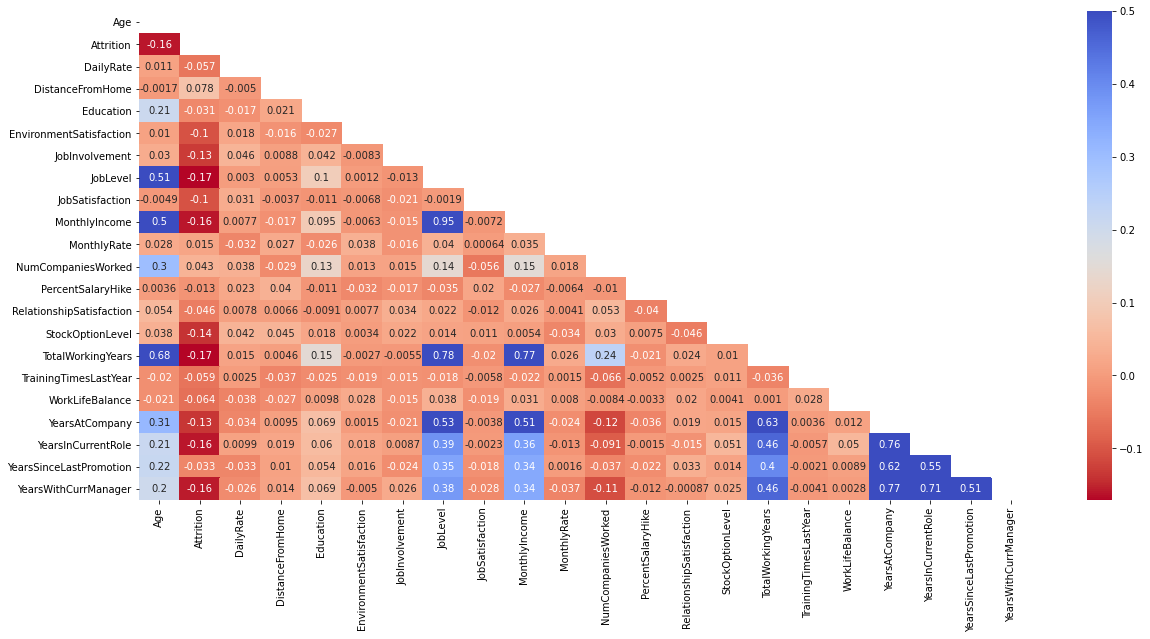

In [14]:
#plotting heatmap to find corelation between variables
corr = df_hr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr, mask=mask, cmap="coolwarm_r",vmax=0.5,annot=True)


Observation: 
    Found correlation between environment satisfaction, monthly income, stock option , total working years

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7398E7CA0>,
      dtype=object)

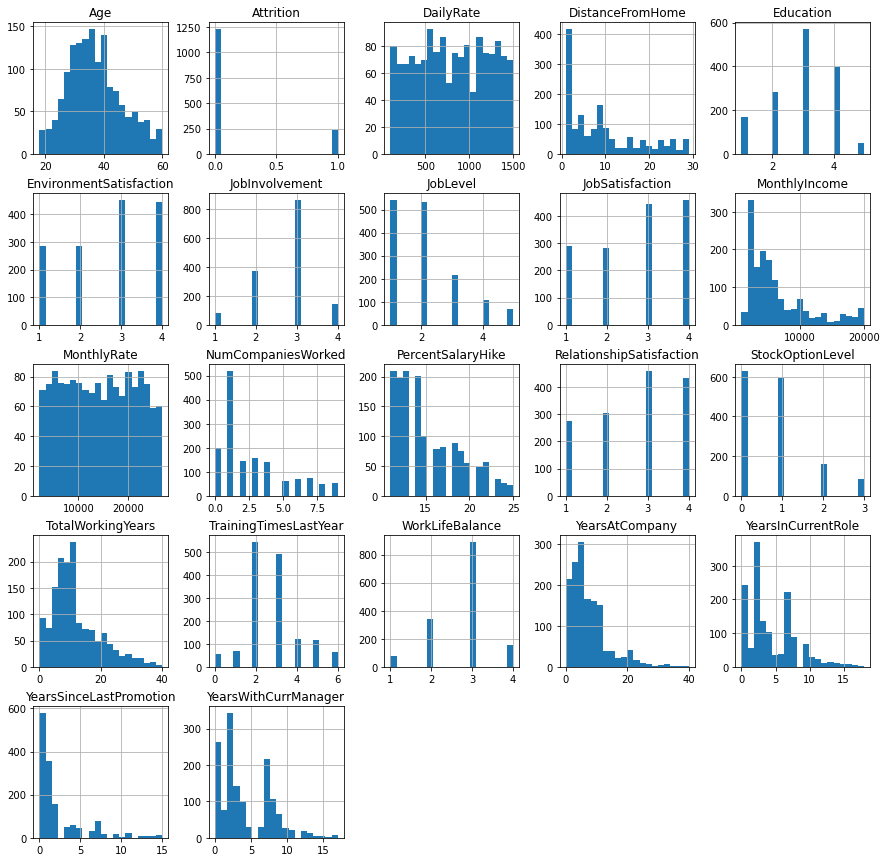

In [15]:
#checking skewness of the data using univariate analysis
#Now plotting histogram for univariate analysis
df_hr.hist(figsize=(15,15), layout=(5,5), bins=20)

Observation: 
    
1. Several features are skewed towards tail; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). 

2. Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.


In [16]:
#To correct the skewness of the data ,we will use skew function

df_hr.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [17]:
#since skewness is >0.55

for col in df_hr.columns:
    if df_hr[col].dtypes != object:
        if df_hr[col].skew() > 0.55:
            if col != "Attrition":
                df_hr[col]=np.sqrt(df_hr[col])
            
df_hr.skew()

#Now all have values less that <0.55

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.398114
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    0.593923
JobSatisfaction            -0.329672
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.655412
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.057528
TotalWorkingYears           0.176358
TrainingTimesLastYear      -1.216268
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole         -0.254344
YearsSinceLastPromotion     0.739126
YearsWithCurrManager       -0.254611
dtype: float64

In [18]:
#To check for outliers , we will use describe functions
df_hr.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,2.725944,2.912925,2.721769,2.729932,1.389160,2.728571,76.153207,...,3.873408,2.712245,0.657599,3.151925,1.609742,2.761224,2.404559,1.776218,1.040282,1.739477
std,9.135373,0.367863,403.509100,1.327760,1.024165,1.093082,0.711561,0.366429,1.102846,26.534871,...,0.454282,1.081209,0.601405,1.160118,0.456281,0.706476,1.107742,1.036837,1.051818,1.047900
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.764760,...,3.316625,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,1.414214,2.000000,2.000000,2.000000,1.000000,2.000000,53.953684,...,3.464102,2.000000,0.000000,2.449490,1.414214,2.000000,1.732051,1.414214,0.000000,1.414214
50%,36.000000,0.000000,802.000000,2.645751,3.000000,3.000000,3.000000,1.414214,3.000000,70.135539,...,3.741657,3.000000,1.000000,3.162278,1.732051,3.000000,2.236068,1.732051,1.000000,1.732051
75%,43.000000,0.000000,1157.000000,3.741657,4.000000,4.000000,3.000000,1.732051,4.000000,91.536877,...,4.242641,4.000000,1.000000,3.872983,1.732051,3.000000,3.000000,2.645751,1.732051,2.645751
max,60.000000,1.000000,1499.000000,5.385165,5.000000,4.000000,4.000000,2.236068,4.000000,141.417821,...,5.000000,4.000000,1.732051,6.324555,2.449490,4.000000,6.324555,4.242641,3.872983,4.123106


Observations:
    No outliers are present in the data as median is close to mean in most of the series.

In [19]:
#Now changing all categorical column into binary form using get_dummies to do EDA
cat_col=[]

for col in df_hr.columns:
    if df_hr.dtypes[col] == object:
        cat_col.append(col)
cat_col

df_HR= pd.get_dummies(df_hr, dtype=float)
df_HR.shape
#Now we have total of 50 columns in our data

(1470, 50)

In [20]:
#Modelling for Classification variable Y- Attrition

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [22]:
# dropping Attrition variable from X 
#assign the value of y for training and testing phase
xc = df_HR.drop(columns=['Attrition'])
yc = df_HR[["Attrition"]]
#Using Attrition price as the target variable

In [23]:
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
sc.fit_transform(xc)
df_xc = pd.DataFrame(xc,columns=xc.columns)

In [24]:
#defining a function to find fit of the model
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.2,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max accuracy score correspond to random state " ,final_state , "is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print("*"*50)

In [25]:
#Now by using multiple Algorithms we are calculating the best Algo which performs best for our data set 
accuracy_scr_max = []
models=[]
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))

for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)
    

**************************************************
Results for model :  Logistic Regression 
 max accuracy score correspond to random state  70 is 0.9047619047619048 
 Mean accuracy score is :  0.8625850340136054 
 Std deviation score is :  0.00976374156082132 
 Cross validation scores are :   [0.85034014 0.8537415  0.86394558 0.87755102 0.86734694]
**************************************************
**************************************************
Results for model :  Random Forest 
 max accuracy score correspond to random state  79 is 0.8809523809523809 
 Mean accuracy score is :  0.8591836734693878 
 Std deviation score is :  0.005526556737847598 
 Cross validation scores are :   [0.84353741 0.86054422 0.86394558 0.85714286 0.86734694]
**************************************************
**************************************************
Results for model :  SVM 
 max accuracy score correspond to random state  42 is 0.8401360544217688 
 Mean accuracy score is :  0.8387755102040817 
 

Observations:
    
    1. From initial model values RandomForest and Linear Regressions are performing better than others.

In [26]:
#Estimating parameters of Linear Regression for best fit
log_rg=LogisticRegression()
parameters={"C":[0.001,0.01,0.1,1,10] }
clf = GridSearchCV(log_rg, parameters, cv=10,scoring="roc_auc")
clf.fit(df_xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)

Best parameter :  {'C': 1} 
Best Estimator :  LogisticRegression(C=1) 
Best Score :  0.7959989566585708


In [27]:
log_rg=LogisticRegression(C=10)
max_acc_score("Logistic Regression" ,log_rg,df_xc,yc)

**************************************************
Results for model :  Logistic Regression 
 max accuracy score correspond to random state  70 is 0.9047619047619048 
 Mean accuracy score is :  0.8687074829931971 
 Std deviation score is :  0.007326754839638789 
 Cross validation scores are :   [0.86394558 0.85714286 0.87414966 0.87755102 0.8707483 ]
**************************************************


In [28]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)

Best parameter :  {'n_estimators': 500} 
Best Estimator :  RandomForestClassifier(n_estimators=500) 
Best Score :  0.8153354226092222


In [29]:
#Again running RFC with n_estimator = 500
#random state ~ 97
rf_clf=RandomForestClassifier(n_estimators=500,random_state=97)
max_acc_score("RandomForest Classifier",rf_clf,df_xc,yc)

**************************************************
Results for model :  RandomForest Classifier 
 max accuracy score correspond to random state  97 is 0.8843537414965986 
 Mean accuracy score is :  0.8639455782312926 
 Std deviation score is :  0.006453627877894659 
 Cross validation scores are :   [0.8537415  0.86394558 0.8707483  0.86054422 0.8707483 ]
**************************************************


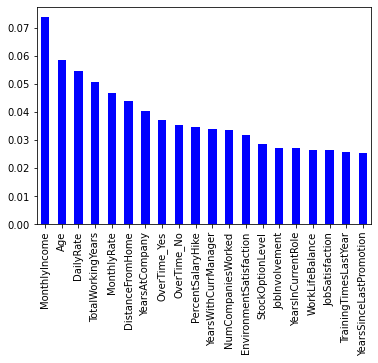

In [30]:
#Plotting important features that contributes most to the attrition
feat_importances = pd.Series(rf_clf.feature_importances_, index=df_xc.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='bar',cmap="winter")

Observations:

    a) Monthly income , Age , DailyRates, Total Working Years are greatest contributers for attrition in the company
    
    b)Clearly Logistic Regression is performing best as accuracy score is closest to 1 so we will use Logistic Regression for Roc_AUC analysis.

In [31]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
log_rg.fit(xc_train,yc_train)
yc_pred=log_rg.predict(xc_test)

accuracy score is :  0.891156462585034
classification report 
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       247
         1.0       0.83      0.40      0.54        47

    accuracy                           0.89       294
   macro avg       0.86      0.69      0.74       294
weighted avg       0.89      0.89      0.88       294



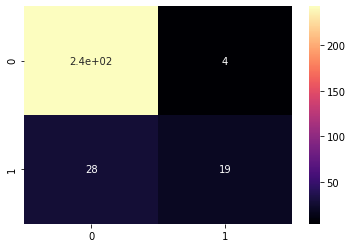

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

In [33]:
pred_pb=log_rg.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)

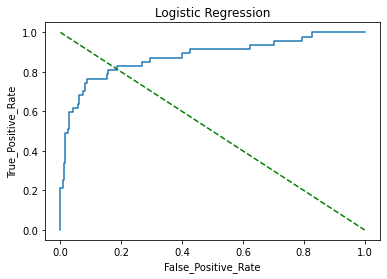

In [34]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Logistic Regression")
plt.show()

Conclusions :

a. Taken output variable as Attrition(transformed into numerical value by replacing Yes with 1 and No with 0

b. Found best model asLogisticRegression(selected on basis of aoc_roc score) and best random state is 80 which provides max accuracy score of 0.92

c. Plotted AOC/ROC line that shows good match between test and predicted values.

d. Also plotted confusion matrix, std deviation mean = 0.06 , avg. accuracy =0.86

e. Overall model fit is good. 

# Overall Remarks :
    
a. Data contained both categorical and numerical data. Converted categories to numerical for EDA analysis.

b. Plotted table with difference in various attributes to ascertain variables with most difference.

c. Also conducted visual analysis to observe following:
   i) Upto 20% more people quit in Research department than Sales dept.
   ii)% of Single people quitting is more than married or divorced employees.
   iii) %of male employees quitting are 20% higher than females

d. Found correlation between environment satisfactin, monthly income, stock option , total working years using heatmap analysis

e. Data was tail skewed and corrected using skew function

f. We observe that outliers were not present in the data

g. Found -Monthly income , Age , DailyRates, Total Working Years are greatest contributers for attrition in the company using randomforest features analysis.

h. Found Classifier model for Attrition.Logistic Regression with highest accuracy. 


# Saving the Model

In [35]:
import joblib
#save the model as a pickle in a file 
joblib.dump(log_rg,'log_rg_hr.pkl')

['log_rg_hr.pkl']